In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def gaussian(x):
    u = sp.exp(-100 * (x - 0.25)**2)
    return u


def step(x):
    u = np.zeros(x.shape)
    for j in range(len(x)):
        if (x[j] >= 0.6) and (x[j] <= 0.8):
            u[j] = 1.0

    return u

def c1(x):
    return 1.0 + 0.0 * x

def c2(x):
    return 2.0 + np.sin(2 * np.pi * x)

def g1(x):
    return sp.exp(-100 * (x - 0.5)**2) * sp.sin(20 * sp.pi * x)

def g2(x):
    return gaussian(x) + step(x)

g = g2
c = c1

In [3]:
T = 1.0

nx = 164
x = np.linspace(0, 1, nx, endpoint=False)
dx = x[1] - x[0]
xx = np.linspace(0, 1, 1000, endpoint=False)

lmbda = 0.95
dt = dx * lmbda
nt = int(T/dt)
print('T = %g' % T)
print('tsteps = %d' % nt)
print('    dx = %g' % dx)
print('    dt = %g' % dt)
print('lambda = %g' % lmbda)

J = np.arange(0, nx)  # all vertices
Jm1 = np.roll(J, 1)
Jp1 = np.roll(J, -1)

T = 1
tsteps = 172
    dx = 0.00609756
    dt = 0.00579268
lambda = 0.95


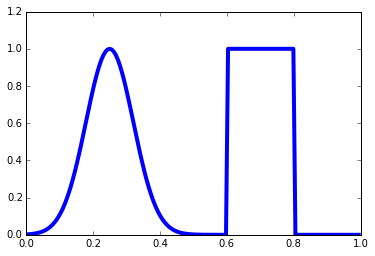

In [11]:
u = g(x)
plt.plot(x, u, lw=4)


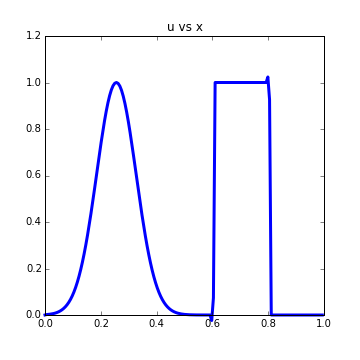
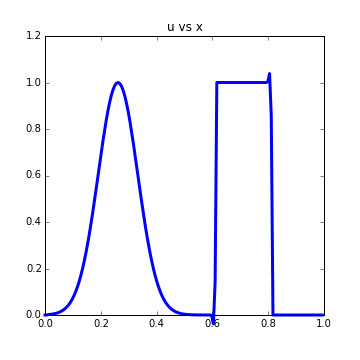
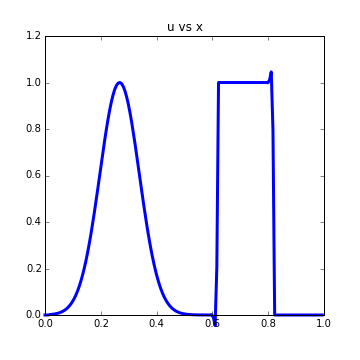
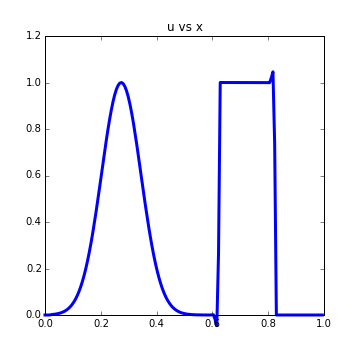
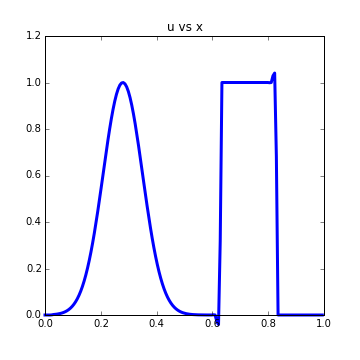
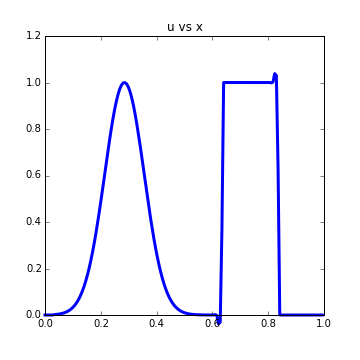
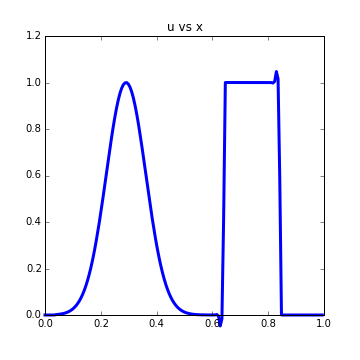
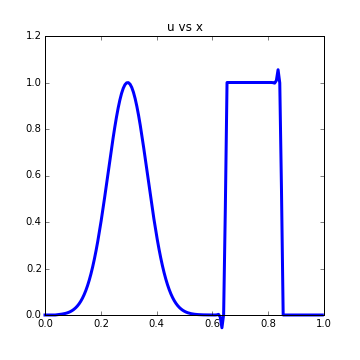
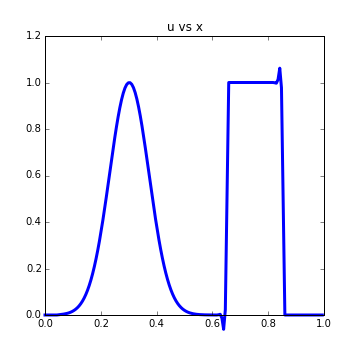
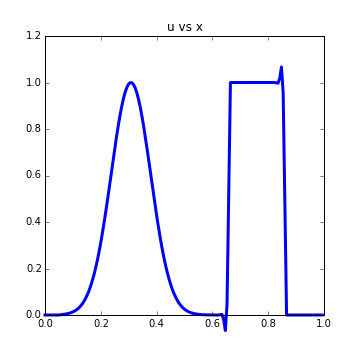
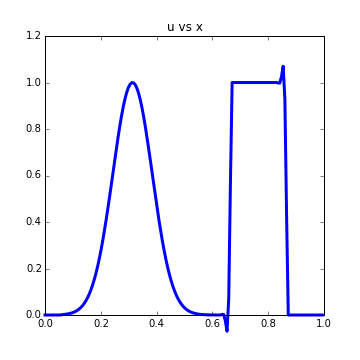
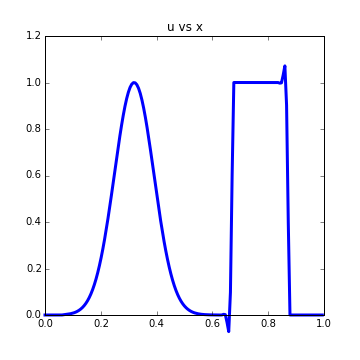
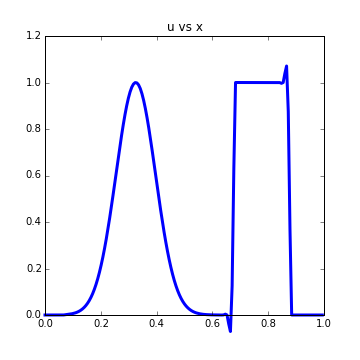
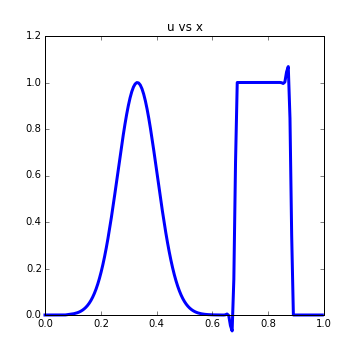
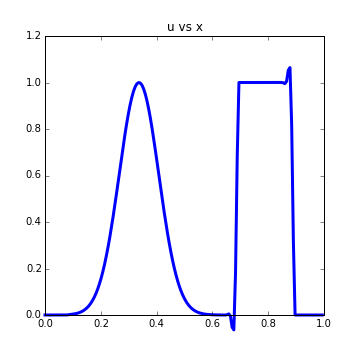
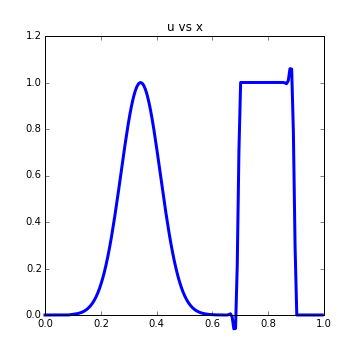
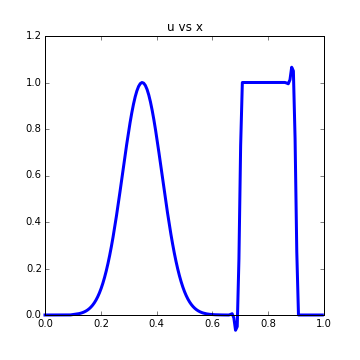
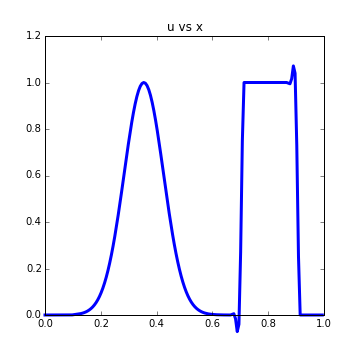
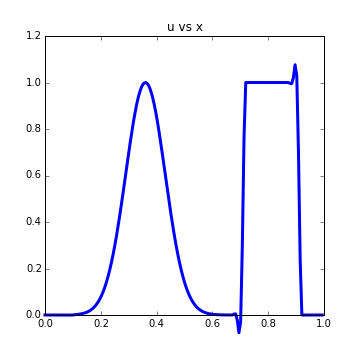
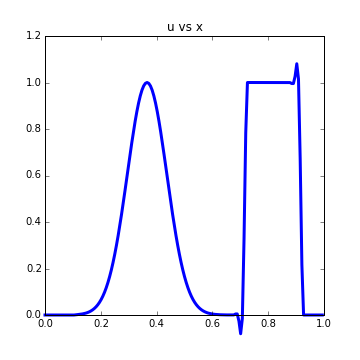
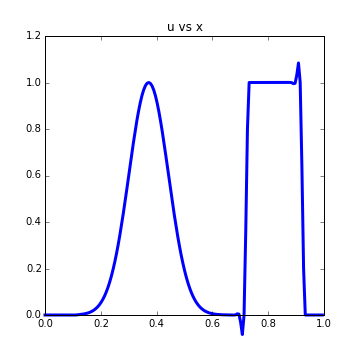
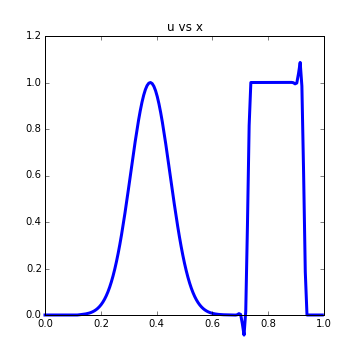
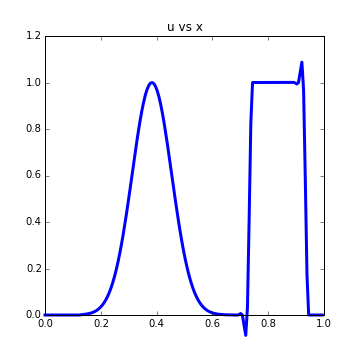
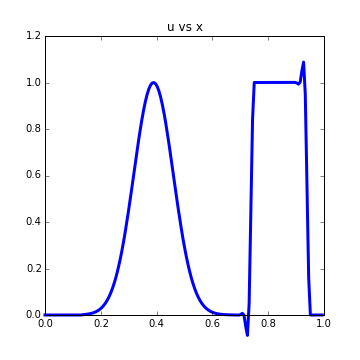
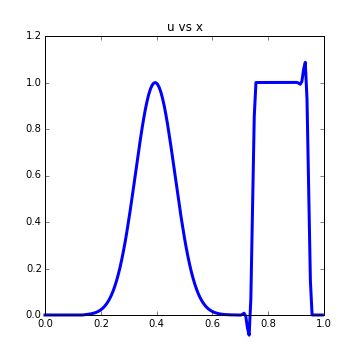
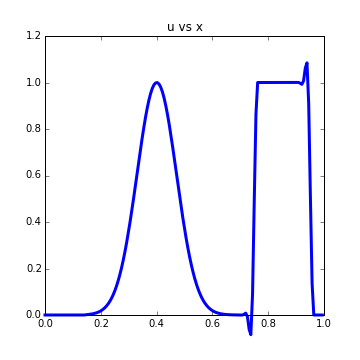
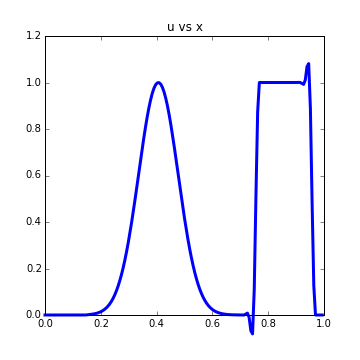
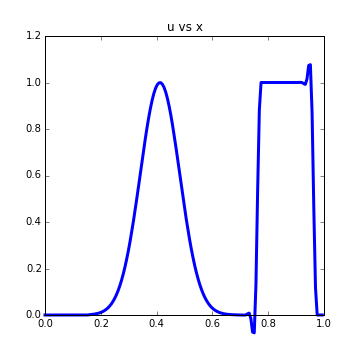
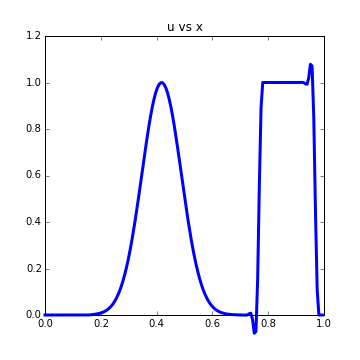
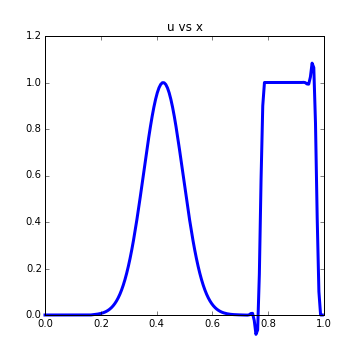
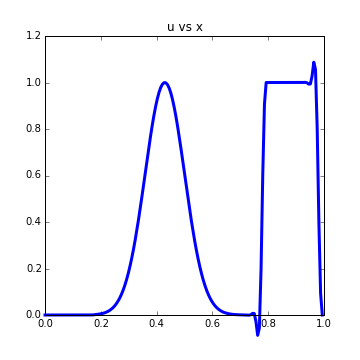
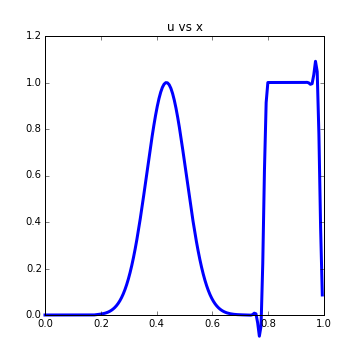
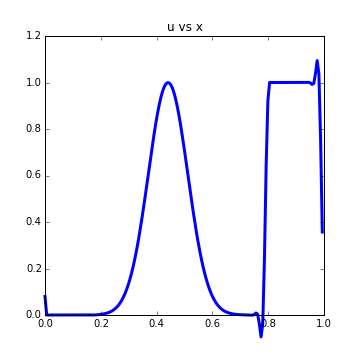
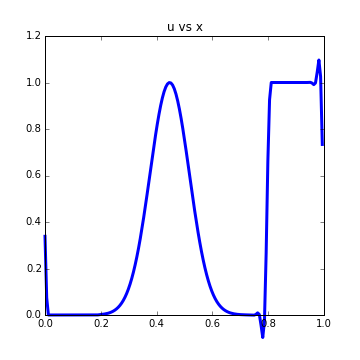
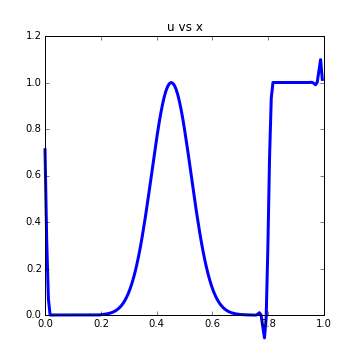
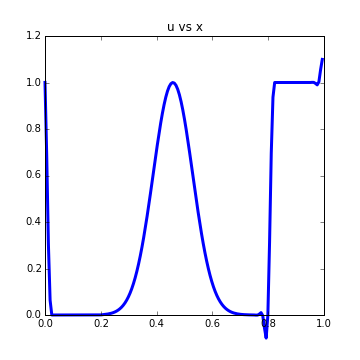
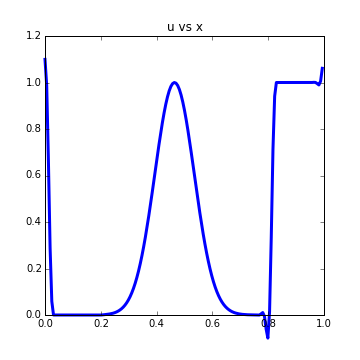
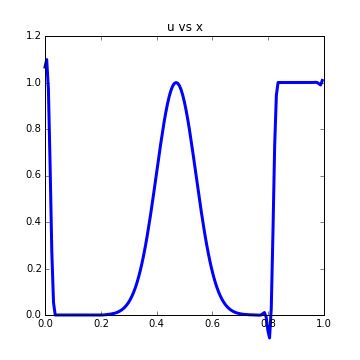
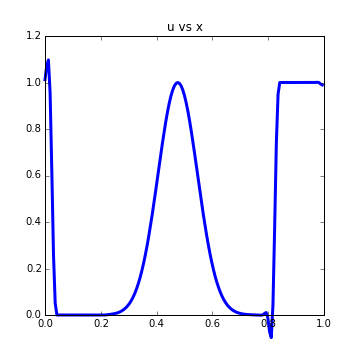
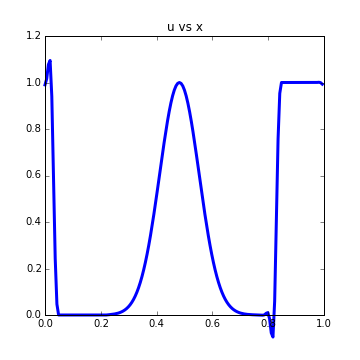
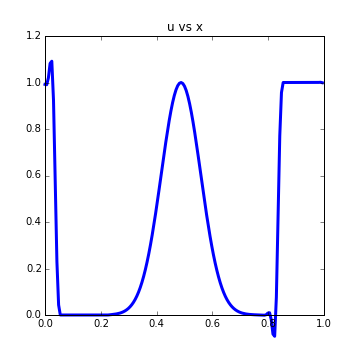
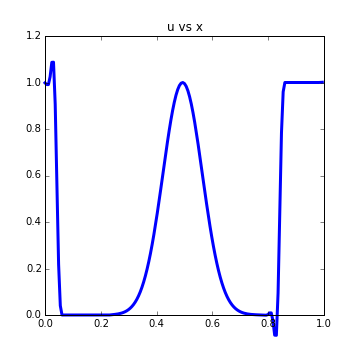
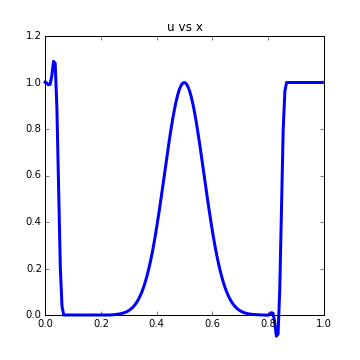
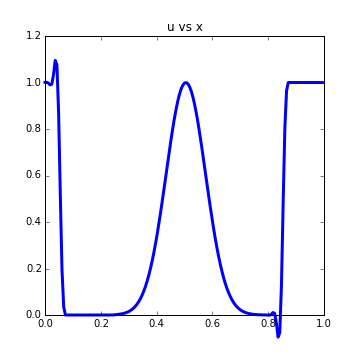
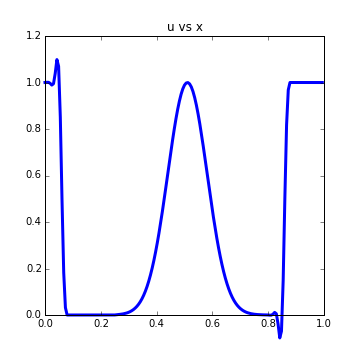
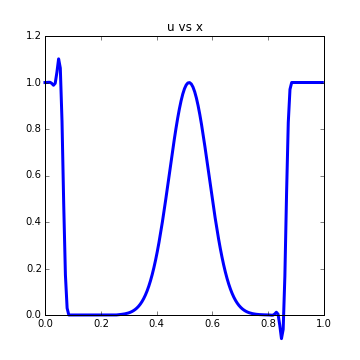
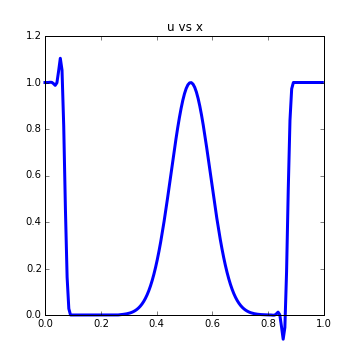
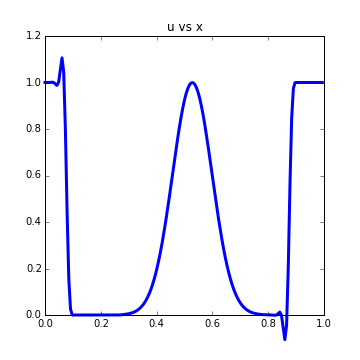
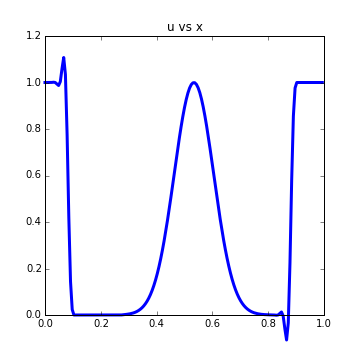
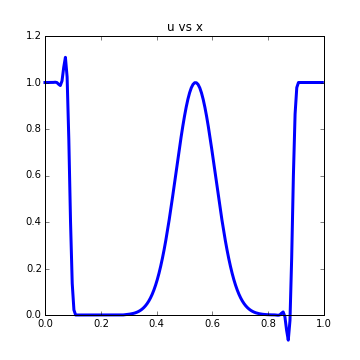
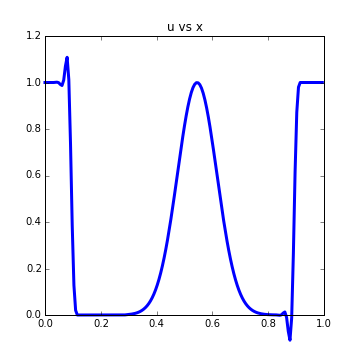
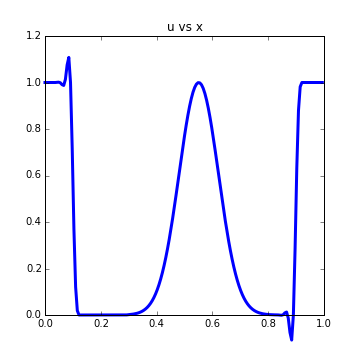
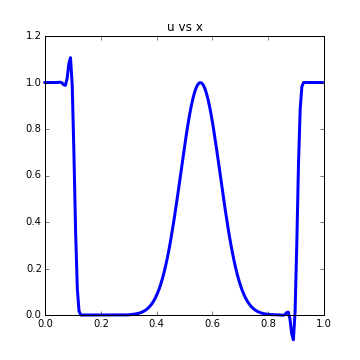
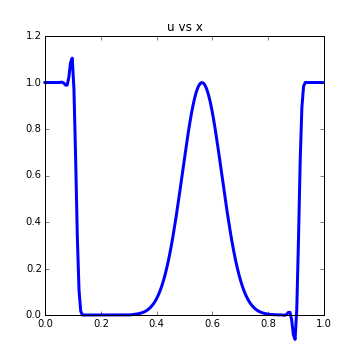
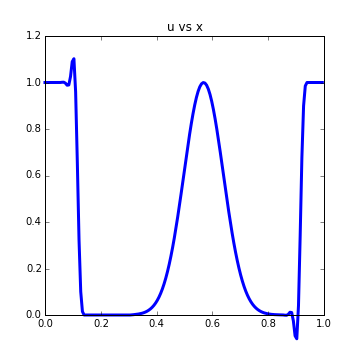
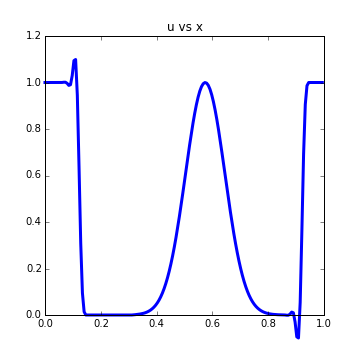
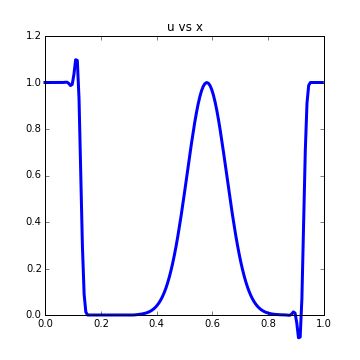
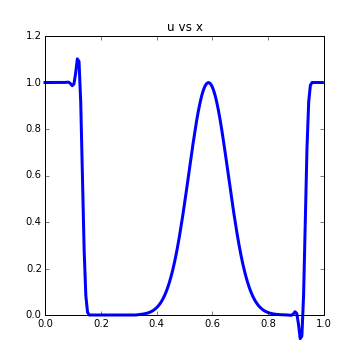
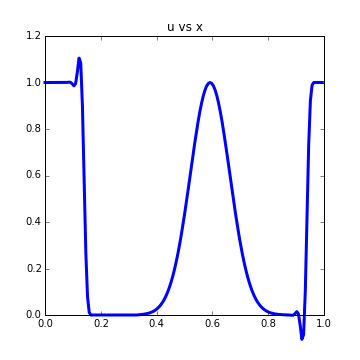
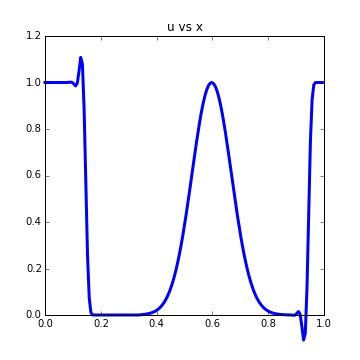
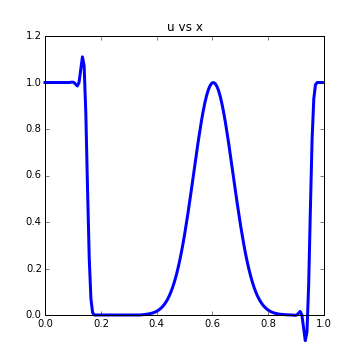
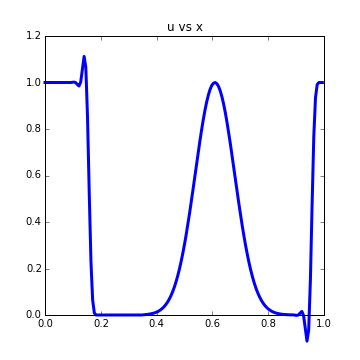
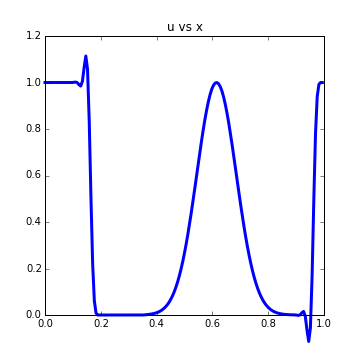
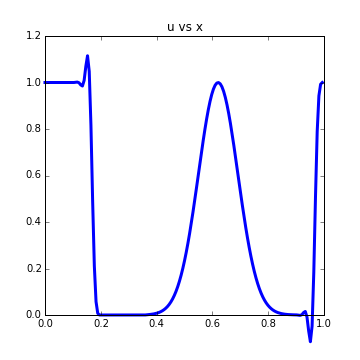
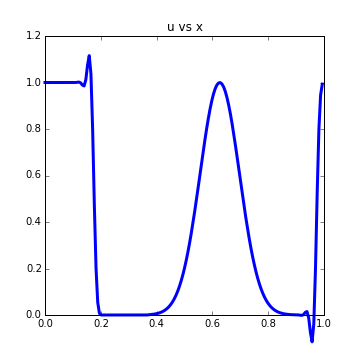
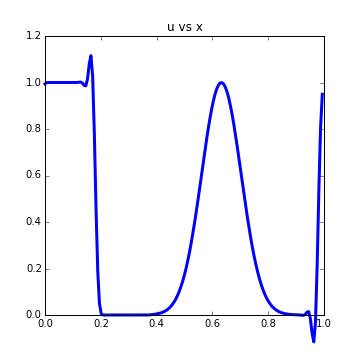
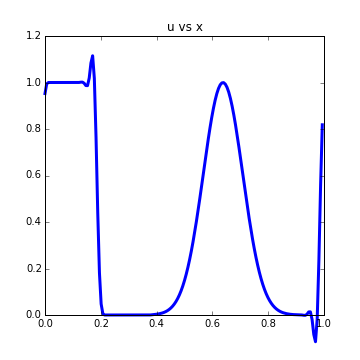
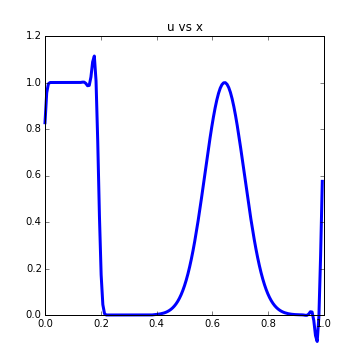
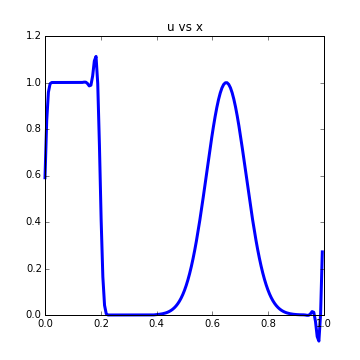
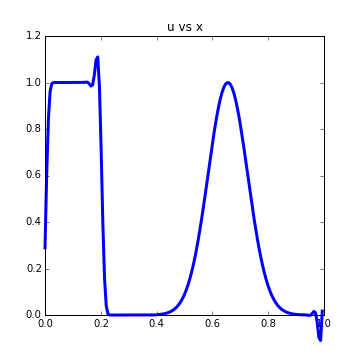
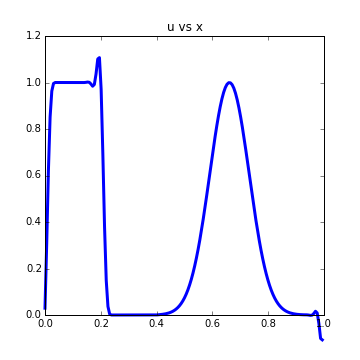
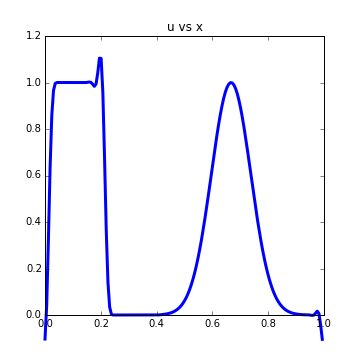
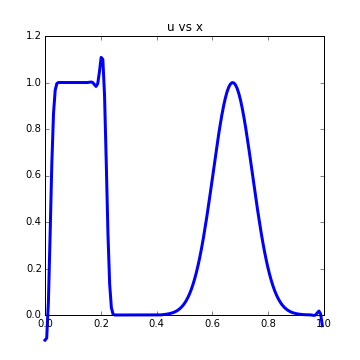
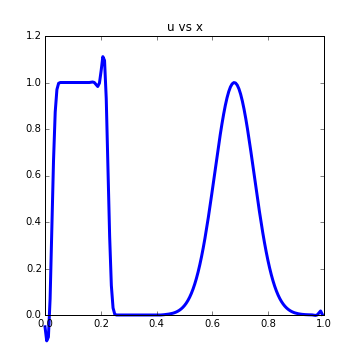
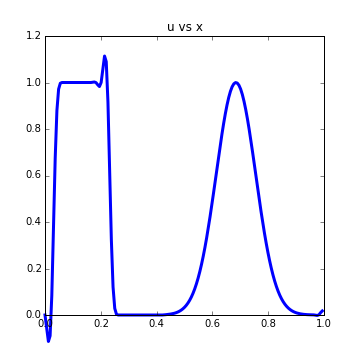
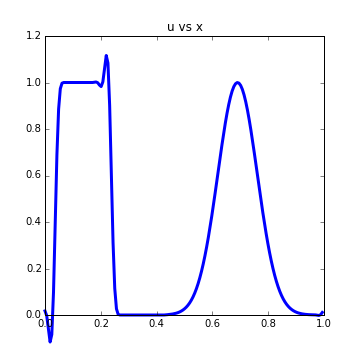
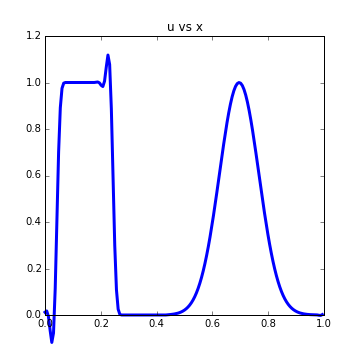
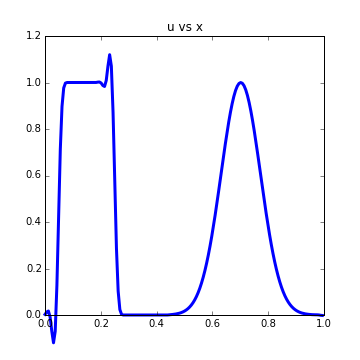
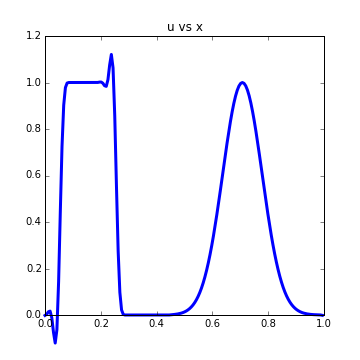
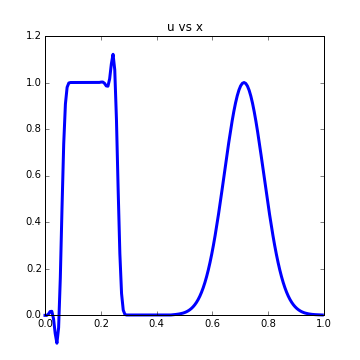
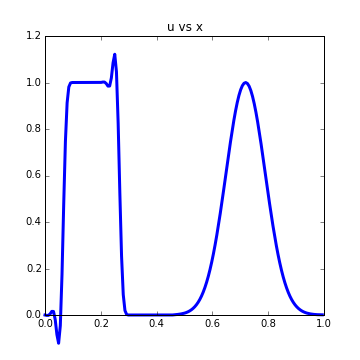
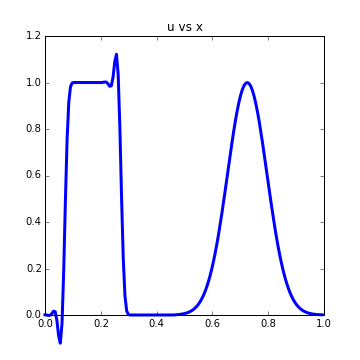
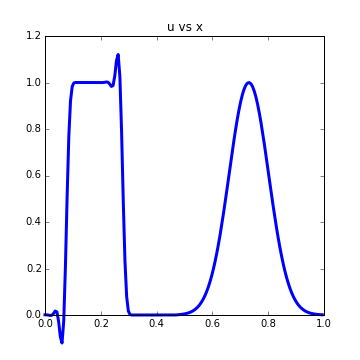
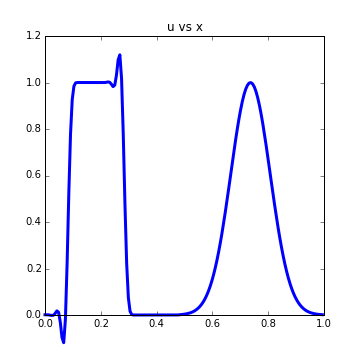
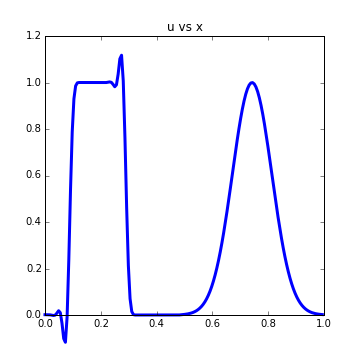
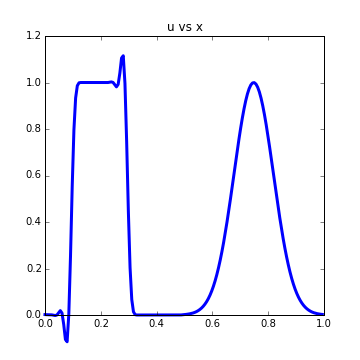
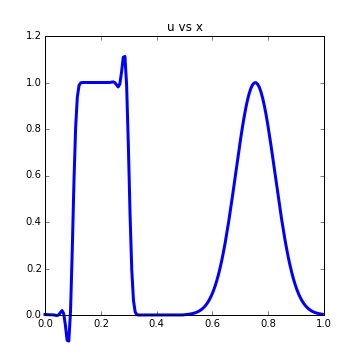
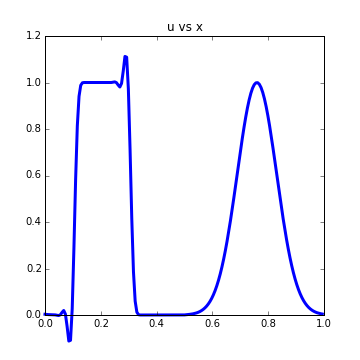
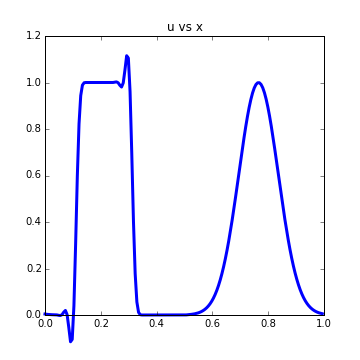
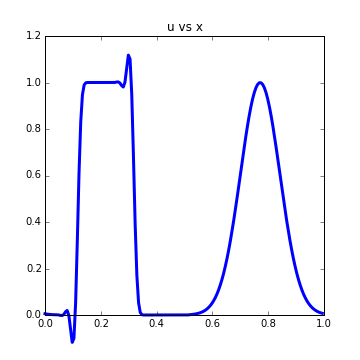
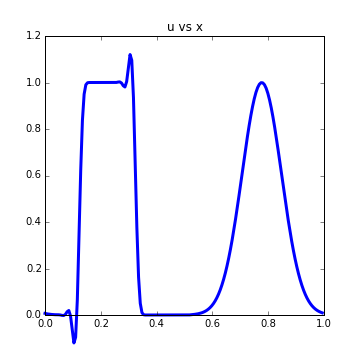
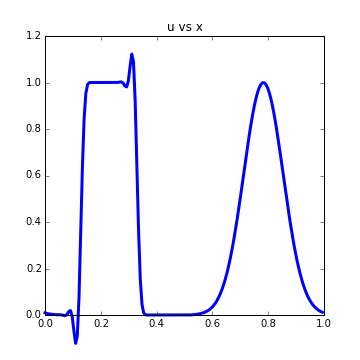
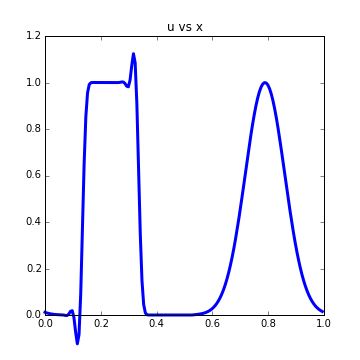
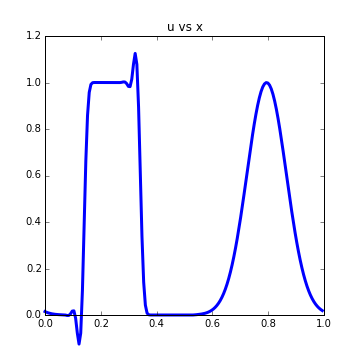
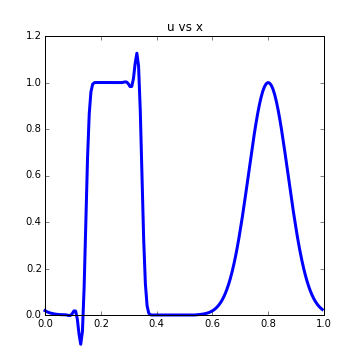
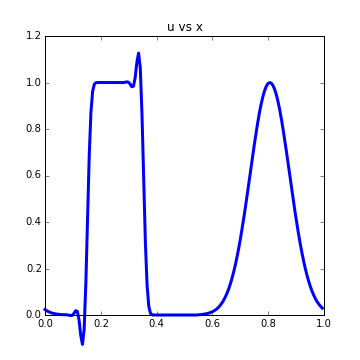
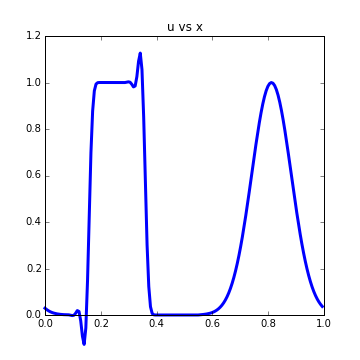
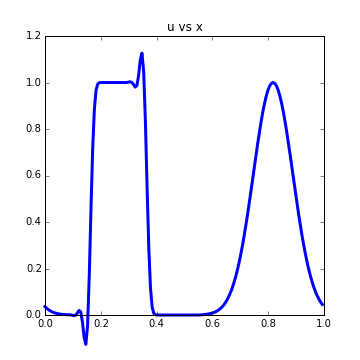
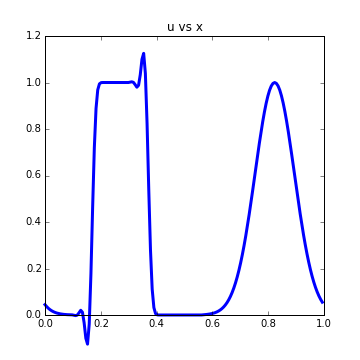
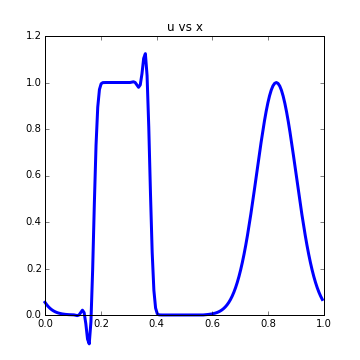
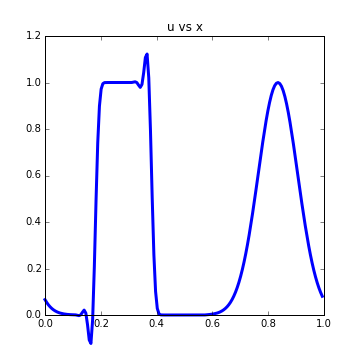
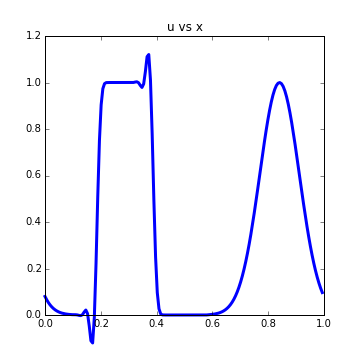
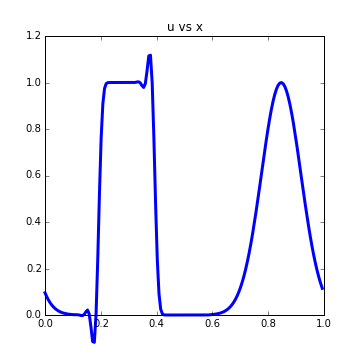
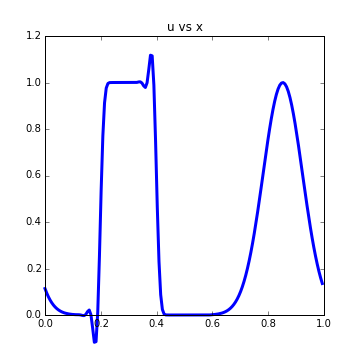
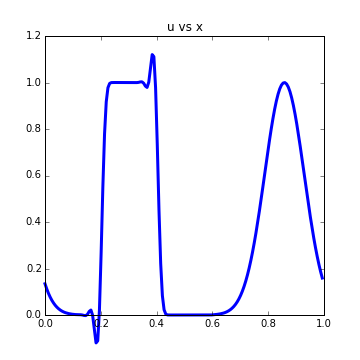
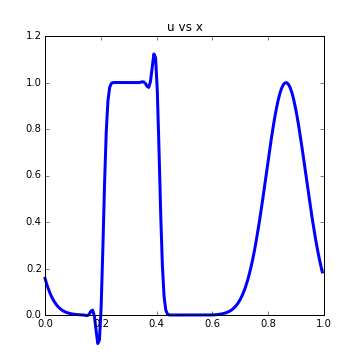
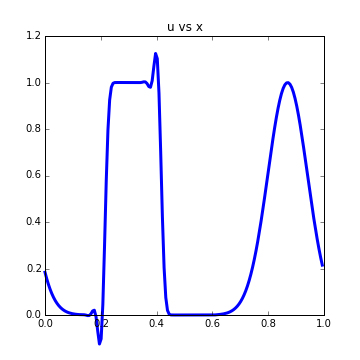
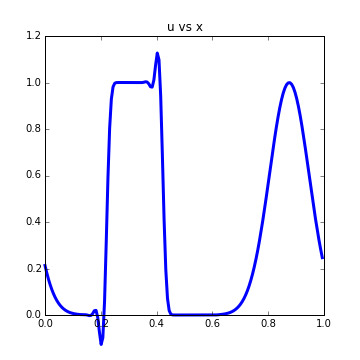
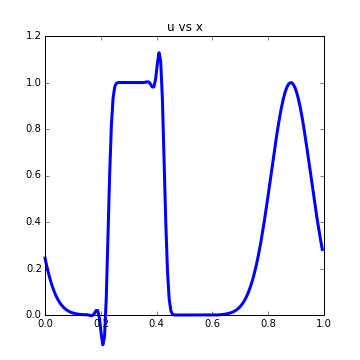
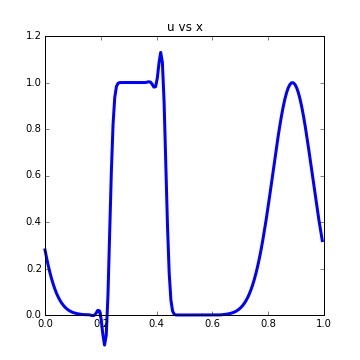
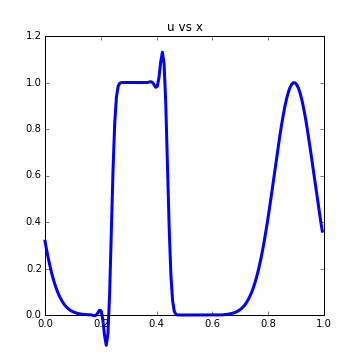
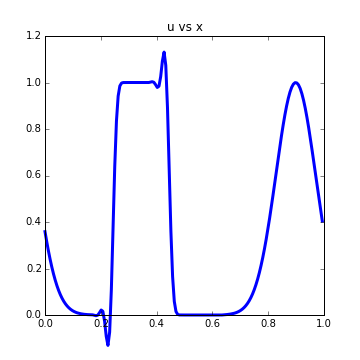
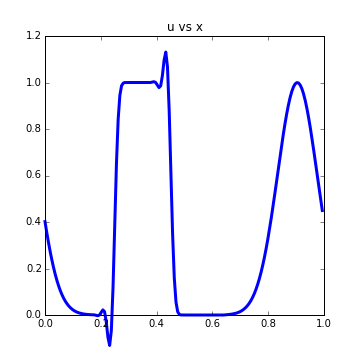
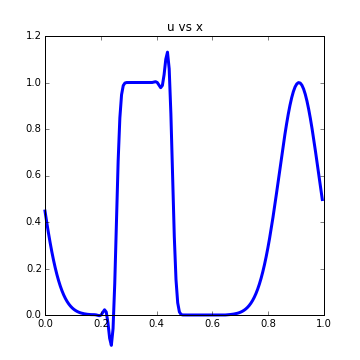
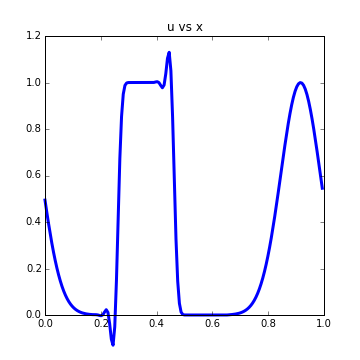
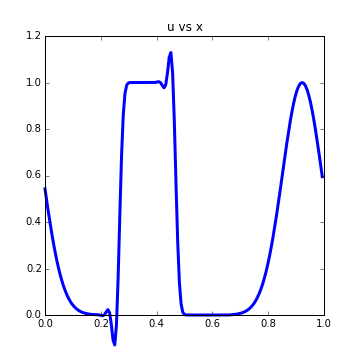
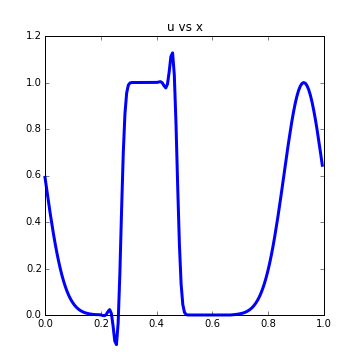
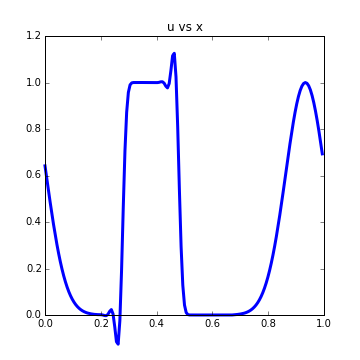
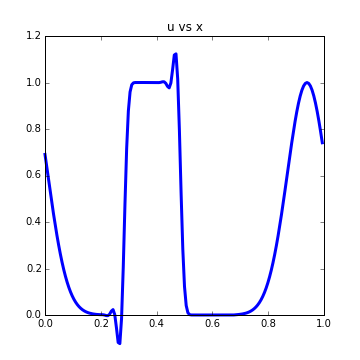
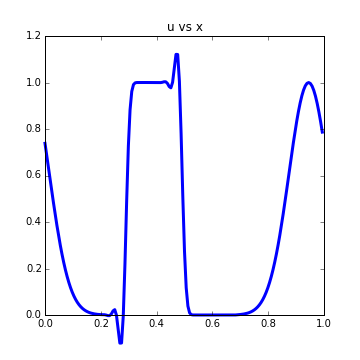
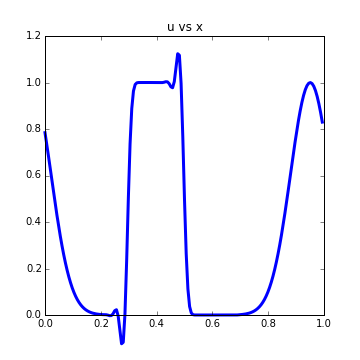
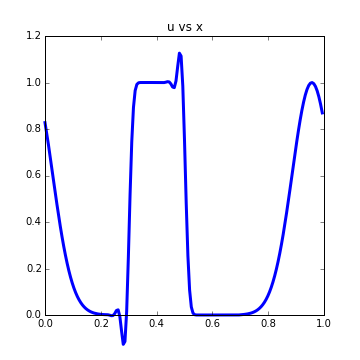
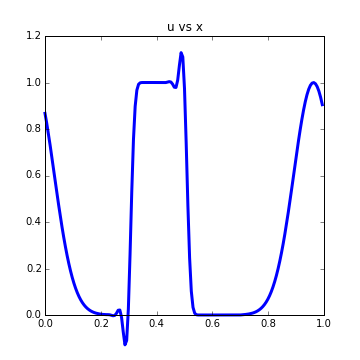
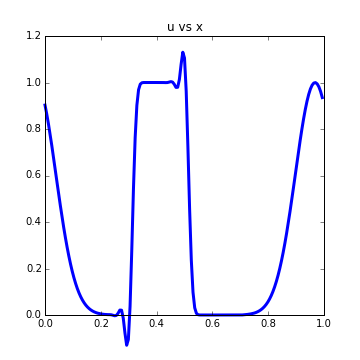
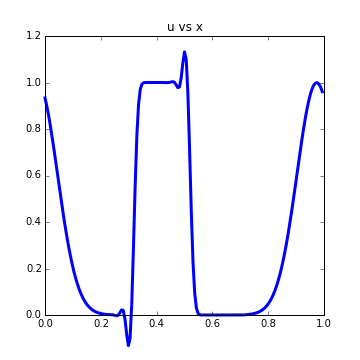
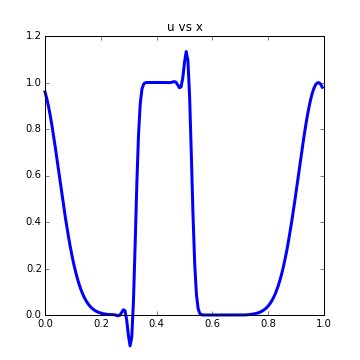
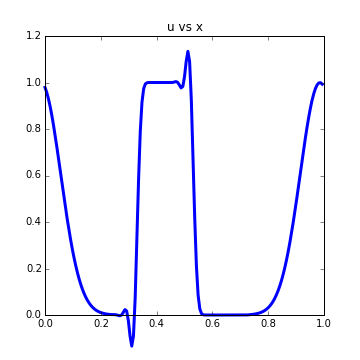
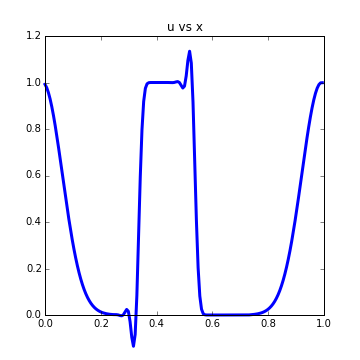
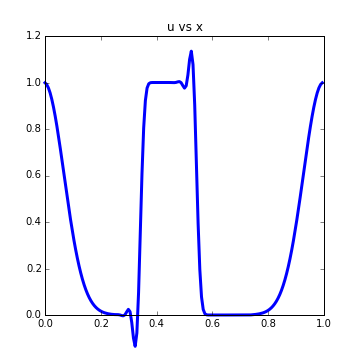
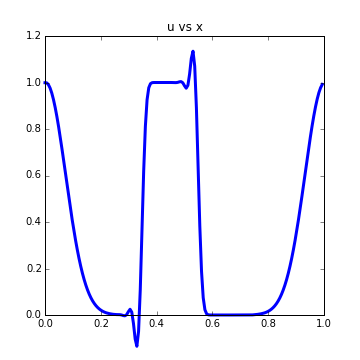
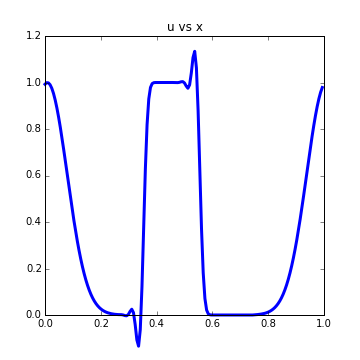
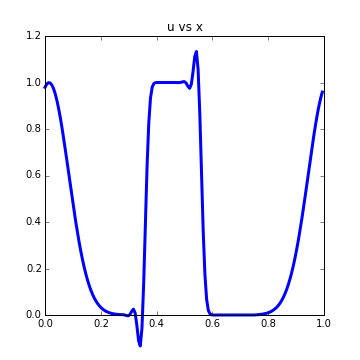
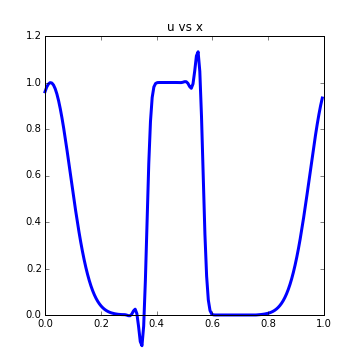
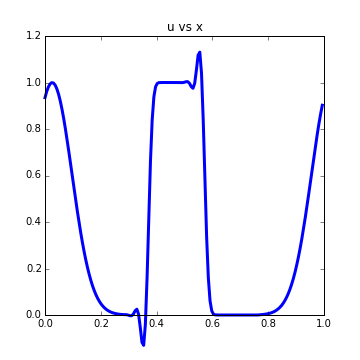
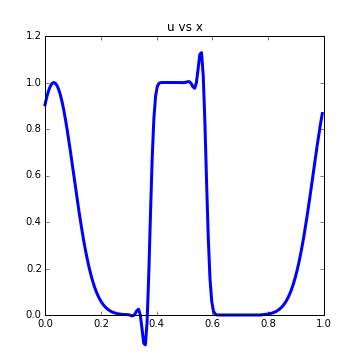
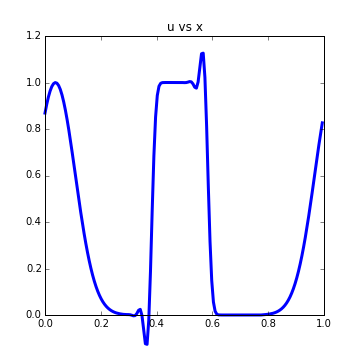
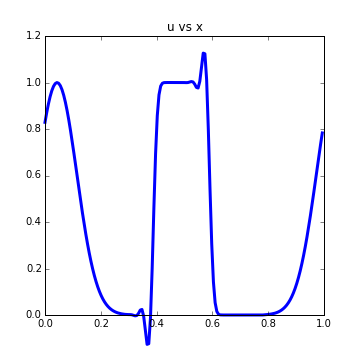
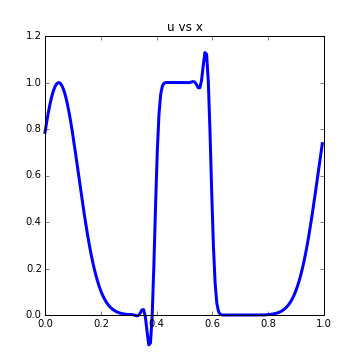
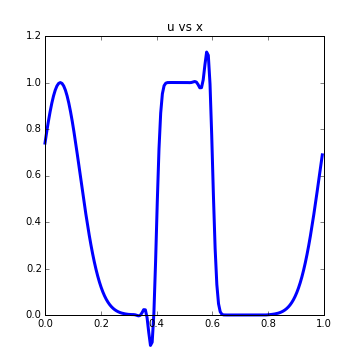
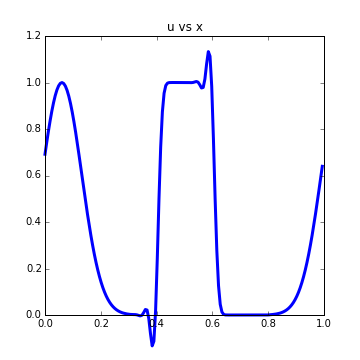
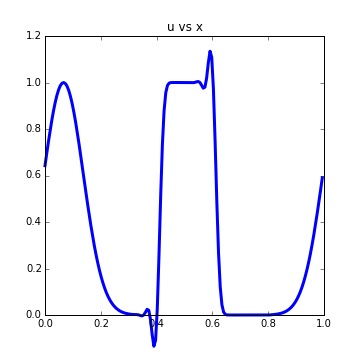
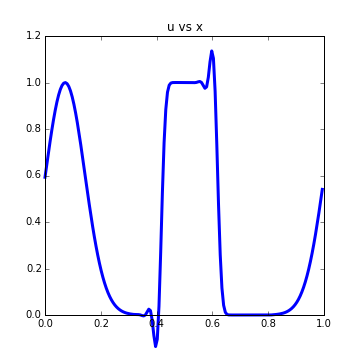
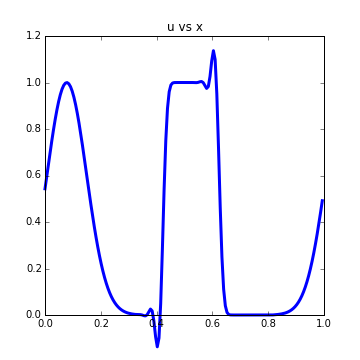
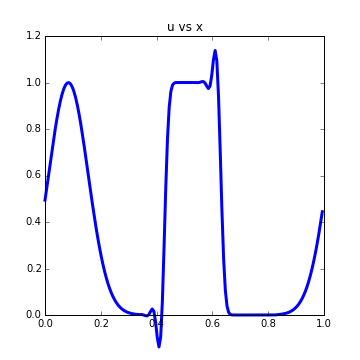
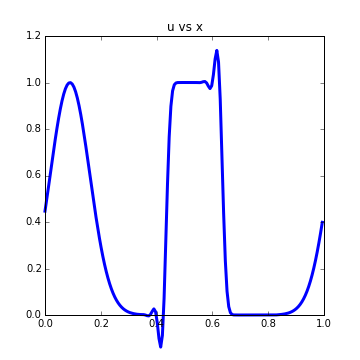
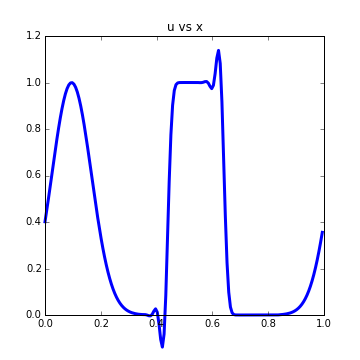
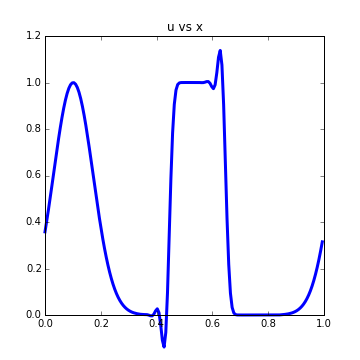
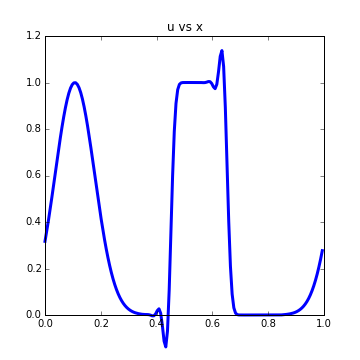
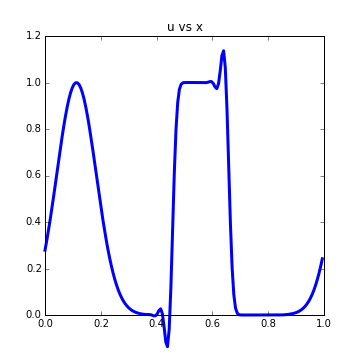
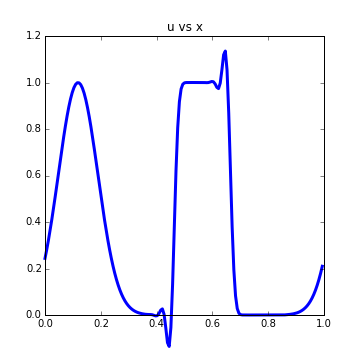
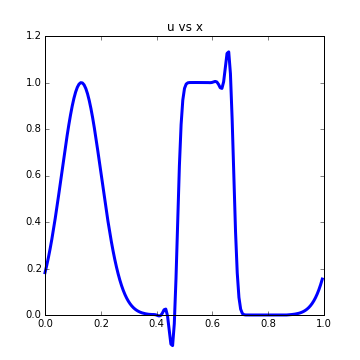
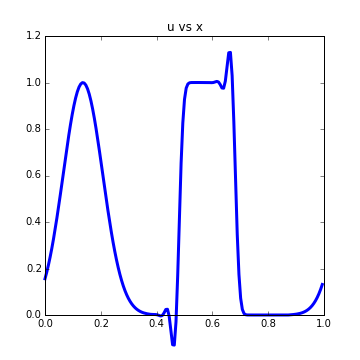
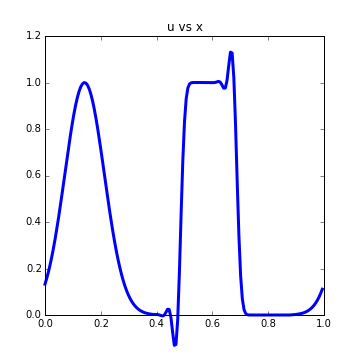
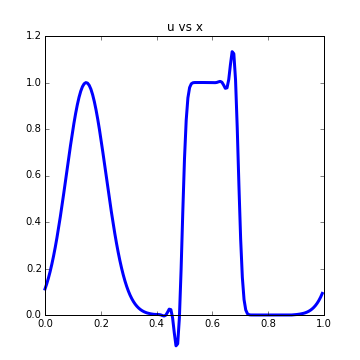
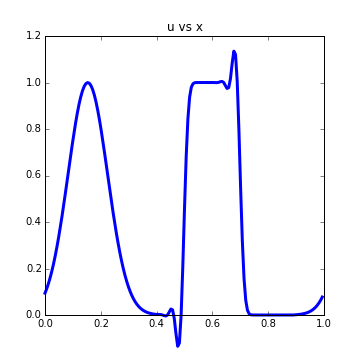
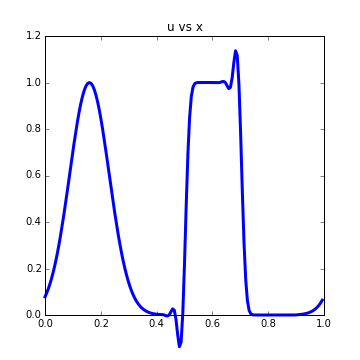
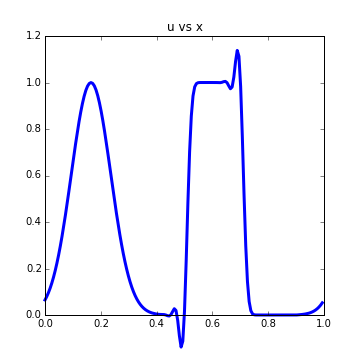
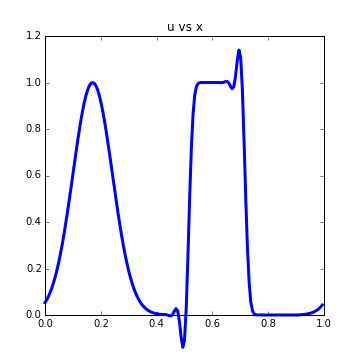
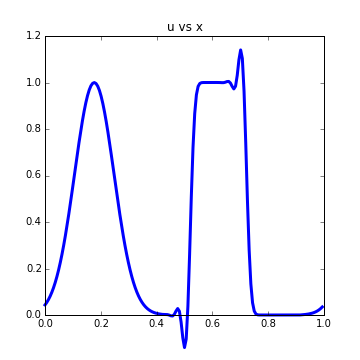
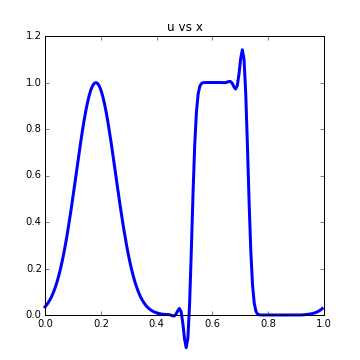
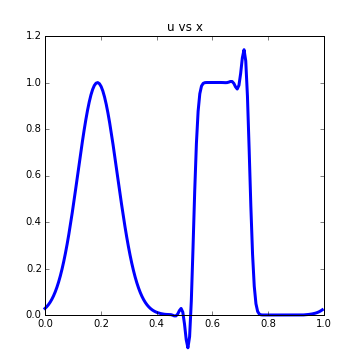
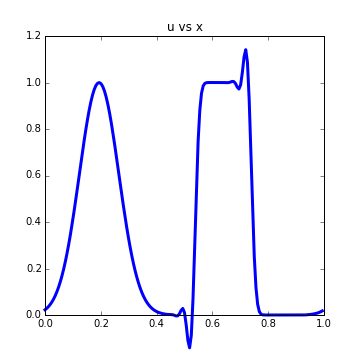
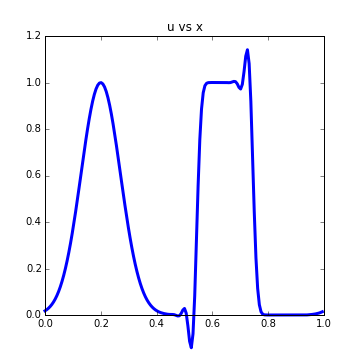
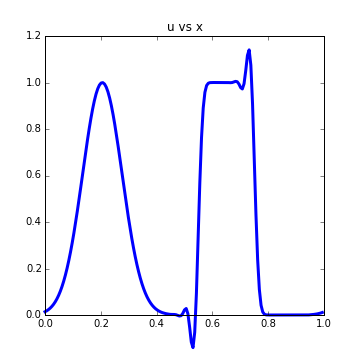
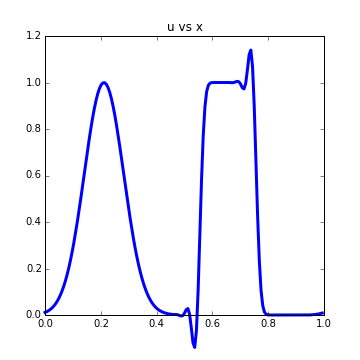
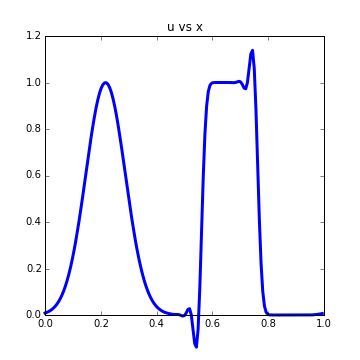
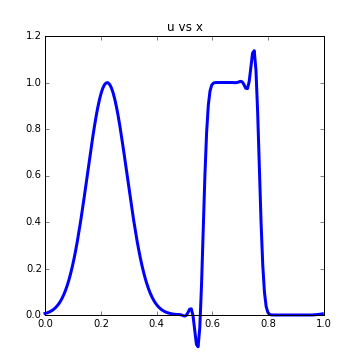
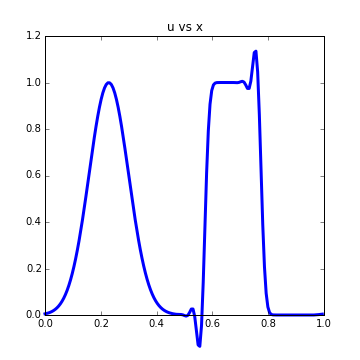
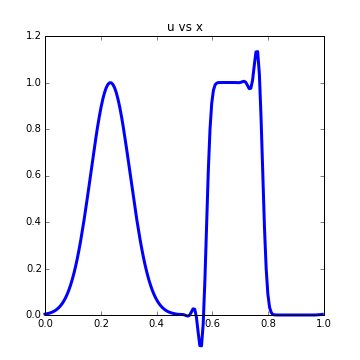
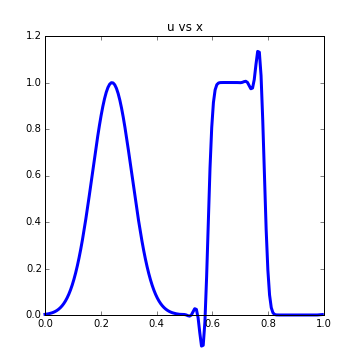
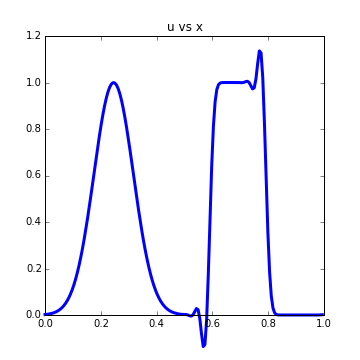

In [12]:
#method= 'constant'
#method = 'laxf'
method = 'linear'
sigtype = 'LaxW'
#sigtype = 'BW'
#sigtype = 'Fromm'
#sigtype = 'minmod'
# sigtype = 'superbee'

import time
#from IPython.display import clear_output, display

plotit = True
if plotit:
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.set_title('u vs x')
    line, = ax.plot(x, u, lw=3, clip_on=False)
    def init():
        line.set_data([], [])
        
def timestepper(n):
    
    if method == 'constant':
        ci = c(x[Jp1])  # at x = i + 1/2
        fi = 0 * ci   # at x = i + 1/2
        pos = np.where(ci >= 0)[0]
        fi[pos] = ci[pos] * u[J[pos]]
        neg = np.where(ci < 0)[0]
        fi[neg] = ci[neg] * u[Jp1[neg]]

        u[J] = u[J] - (dt / dx) * (fi[J] - fi[Jm1])        
        
    if method == 'laxf':
    
        u[J] = 0.5 * (u[Jp1] + u[Jm1])\
            - (dt / dx / 2.0) * (u[Jp1] - u[Jm1])
            
    if method == 'linear':
        if sigtype == 'LaxW':
            sig = (u[Jp1] - u[J]) / dx

        if sigtype == 'BW':
            sig = (u[J] - u[Jm1]) / dx

        if sigtype == 'Fromm':
            sig = (u[Jp1] - u[Jm1]) / (2.0 * dx)
            
        u[J] = u[J] - (c(x[J]) * dt / dx) * (u[J] - u[Jm1])\
                    - (c(x[J]) * dt / (2.0 * dx)) * (sig[J] - sig[Jm1])\
                                                  * (dx - c(x[J]) * dt)

    line.set_data(x, u)
    
    return line

from JSAnimation import IPython_display
from matplotlib import animation
animation.FuncAnimation(fig, timestepper, init_func=init, frames=nt, interval=20, blit=True)